In [1]:
import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor,imageoperations
import os
import pandas as pd
from pandas import DataFrame as DF
import warnings
import time
from time import sleep
from tqdm import tqdm


In [2]:
image_file_name=r"E:\Final Project Work\DataSet Files\Augment\Nodule_crop_Aug\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt_5_1_roi.npy"
mask_file_name=r"E:\Final Project Work\DataSet Files\Augment\Nodule_crop_Aug\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt_5_1_label.npy"

In [4]:
img=np.load(image_file_name)
msk=np.load(mask_file_name)

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [8]:
img.shape

(64, 64, 64)

In [107]:
import numpy as np
from skimage.transform import resize



(64, 64, 64)

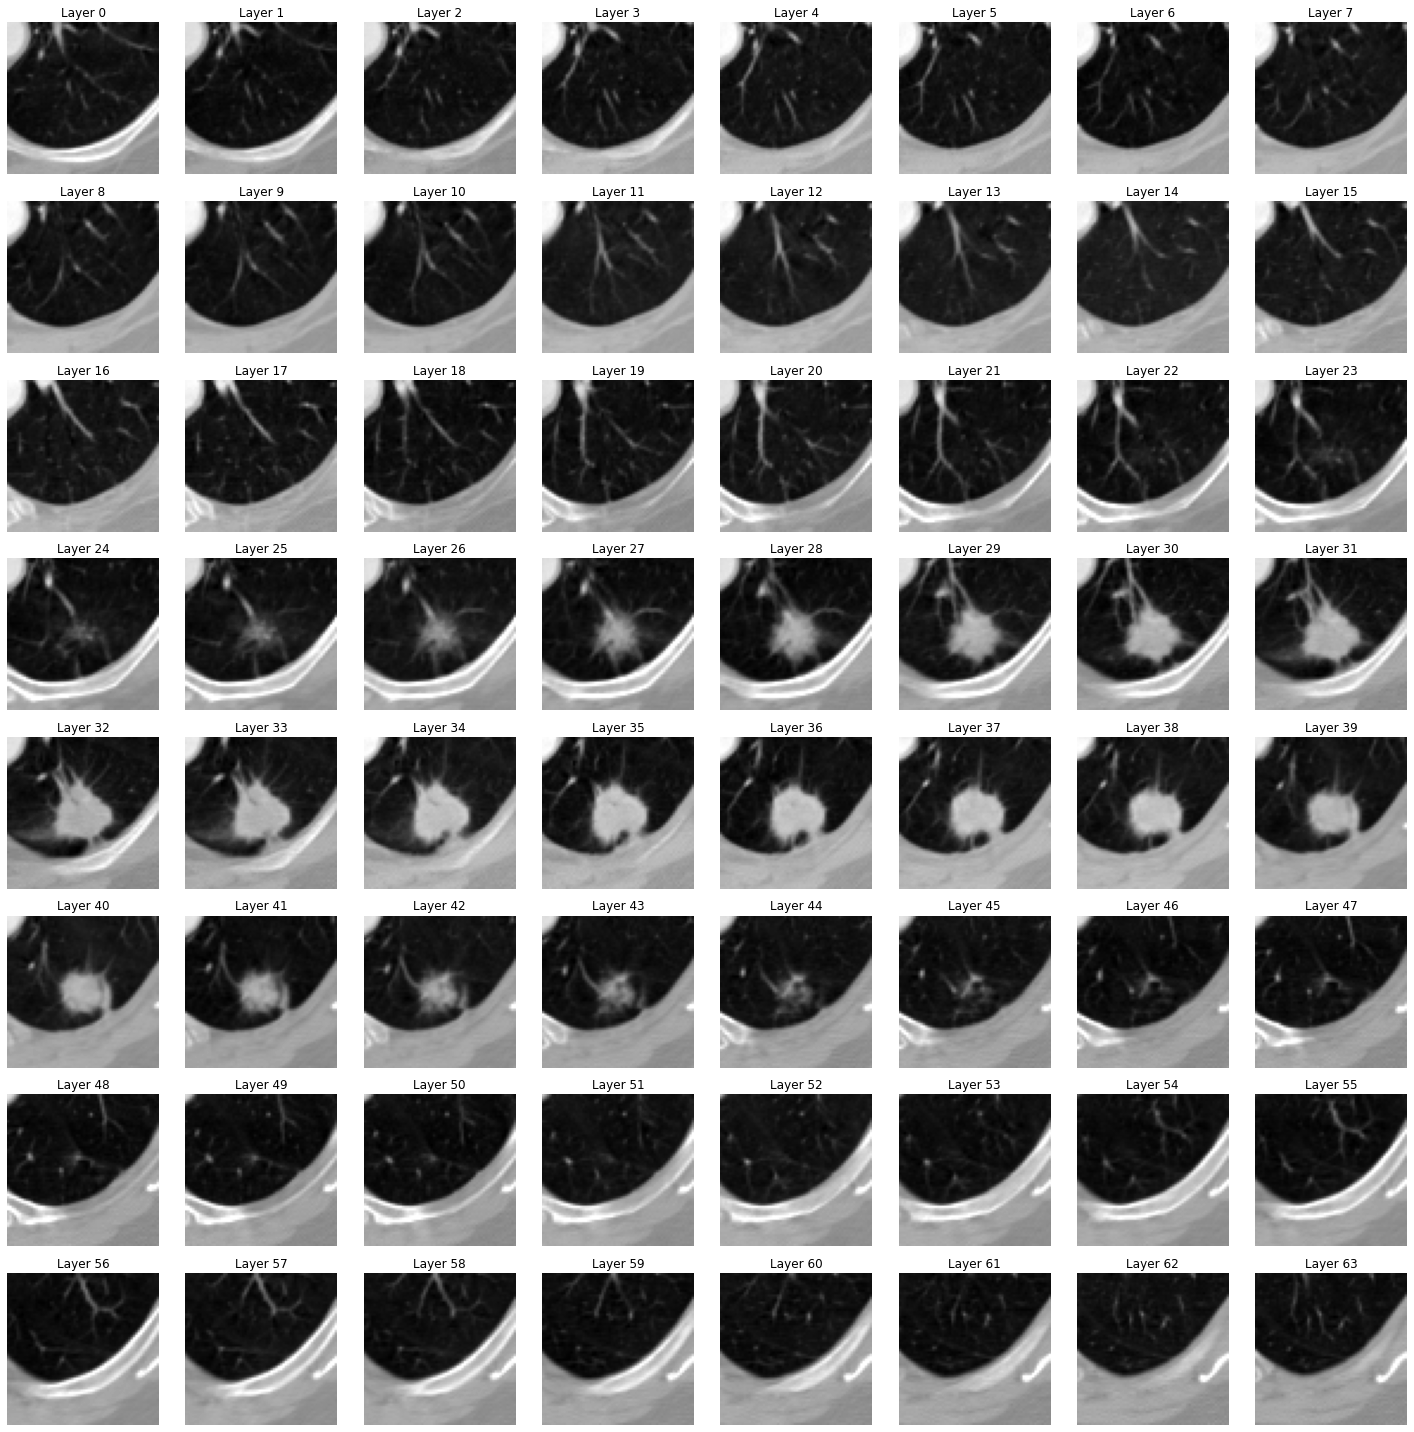

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load your 3D image from the npy file
#image = np.load('your_image.npy')
image=img
# Display each layer of the image
num_layers = image.shape[2]  # Assuming the depth is along the third axis
fig, axes = plt.subplots(8, 8, figsize=(20, 20))  # Adjust the size as needed

for i in range(num_layers):
    row = i // 8
    col = i % 8
    axes[row, col].imshow(image[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Layer {i}')

plt.tight_layout()
plt.show()


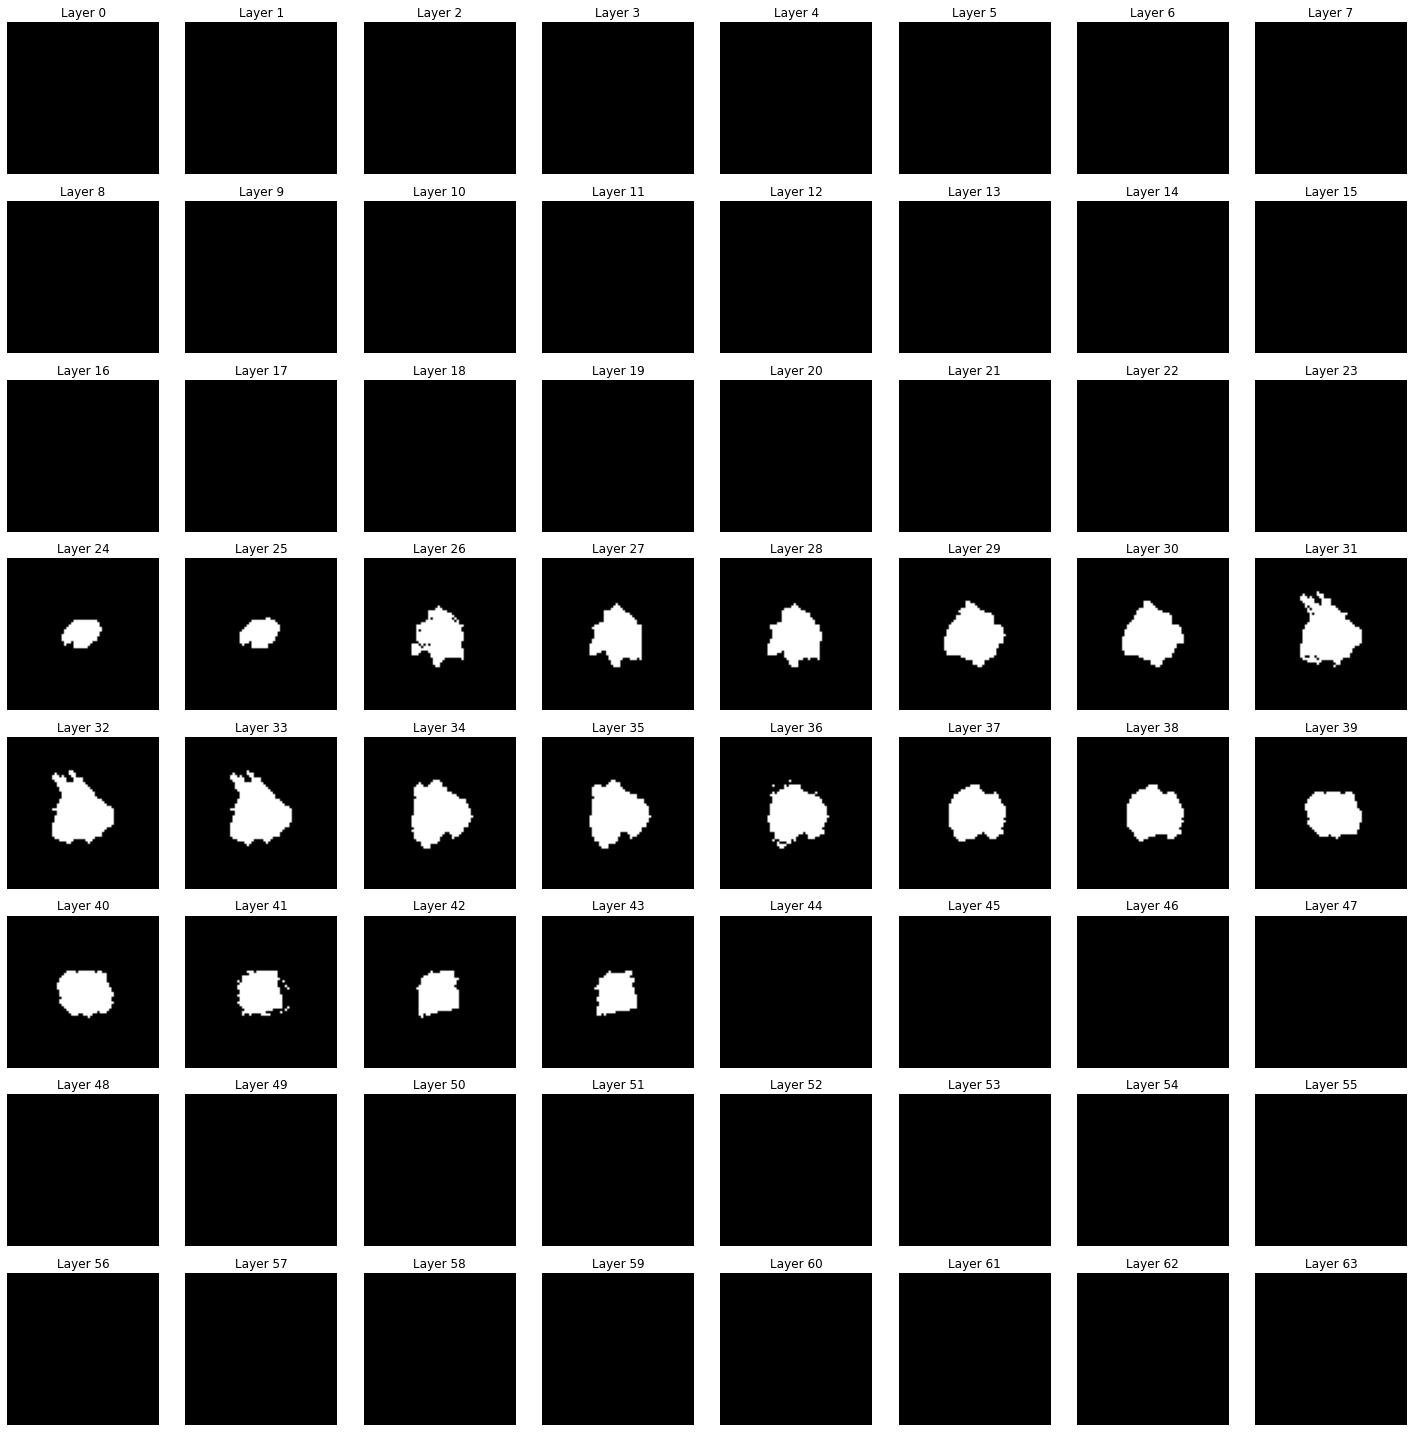

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load your 3D image from the npy file
#image = np.load('your_image.npy')
image=msk
# Display each layer of the image
num_layers = image.shape[2]  # Assuming the depth is along the third axis
fig, axes = plt.subplots(8, 8, figsize=(20, 20))  # Adjust the size as needed

for i in range(num_layers):
    row = i // 8
    col = i % 8
    axes[row, col].imshow(image[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Layer {i}')

plt.tight_layout()
plt.show()

In [11]:


# Load the 3D image
image_file_name=r"E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_roi.npy"
mask_file_name=r"E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_mask.npy"
# Load the 3D image and mask
image = np.load(image_file_name)
mask = np.load(mask_file_name)


# Save the rotated image
image=rotated_image
# Display each layer of the image
num_layers = image.shape[2]  # Assuming the depth is along the third axis
fig, axes = plt.subplots(8, 8, figsize=(20, 20))  # Adjust the size as needed

for i in range(num_layers):
    row = i // 8
    col = i % 8
    axes[row, col].imshow(image[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Layer {i}')

plt.tight_layout()
plt.show()

NameError: name 'rotated_image' is not defined

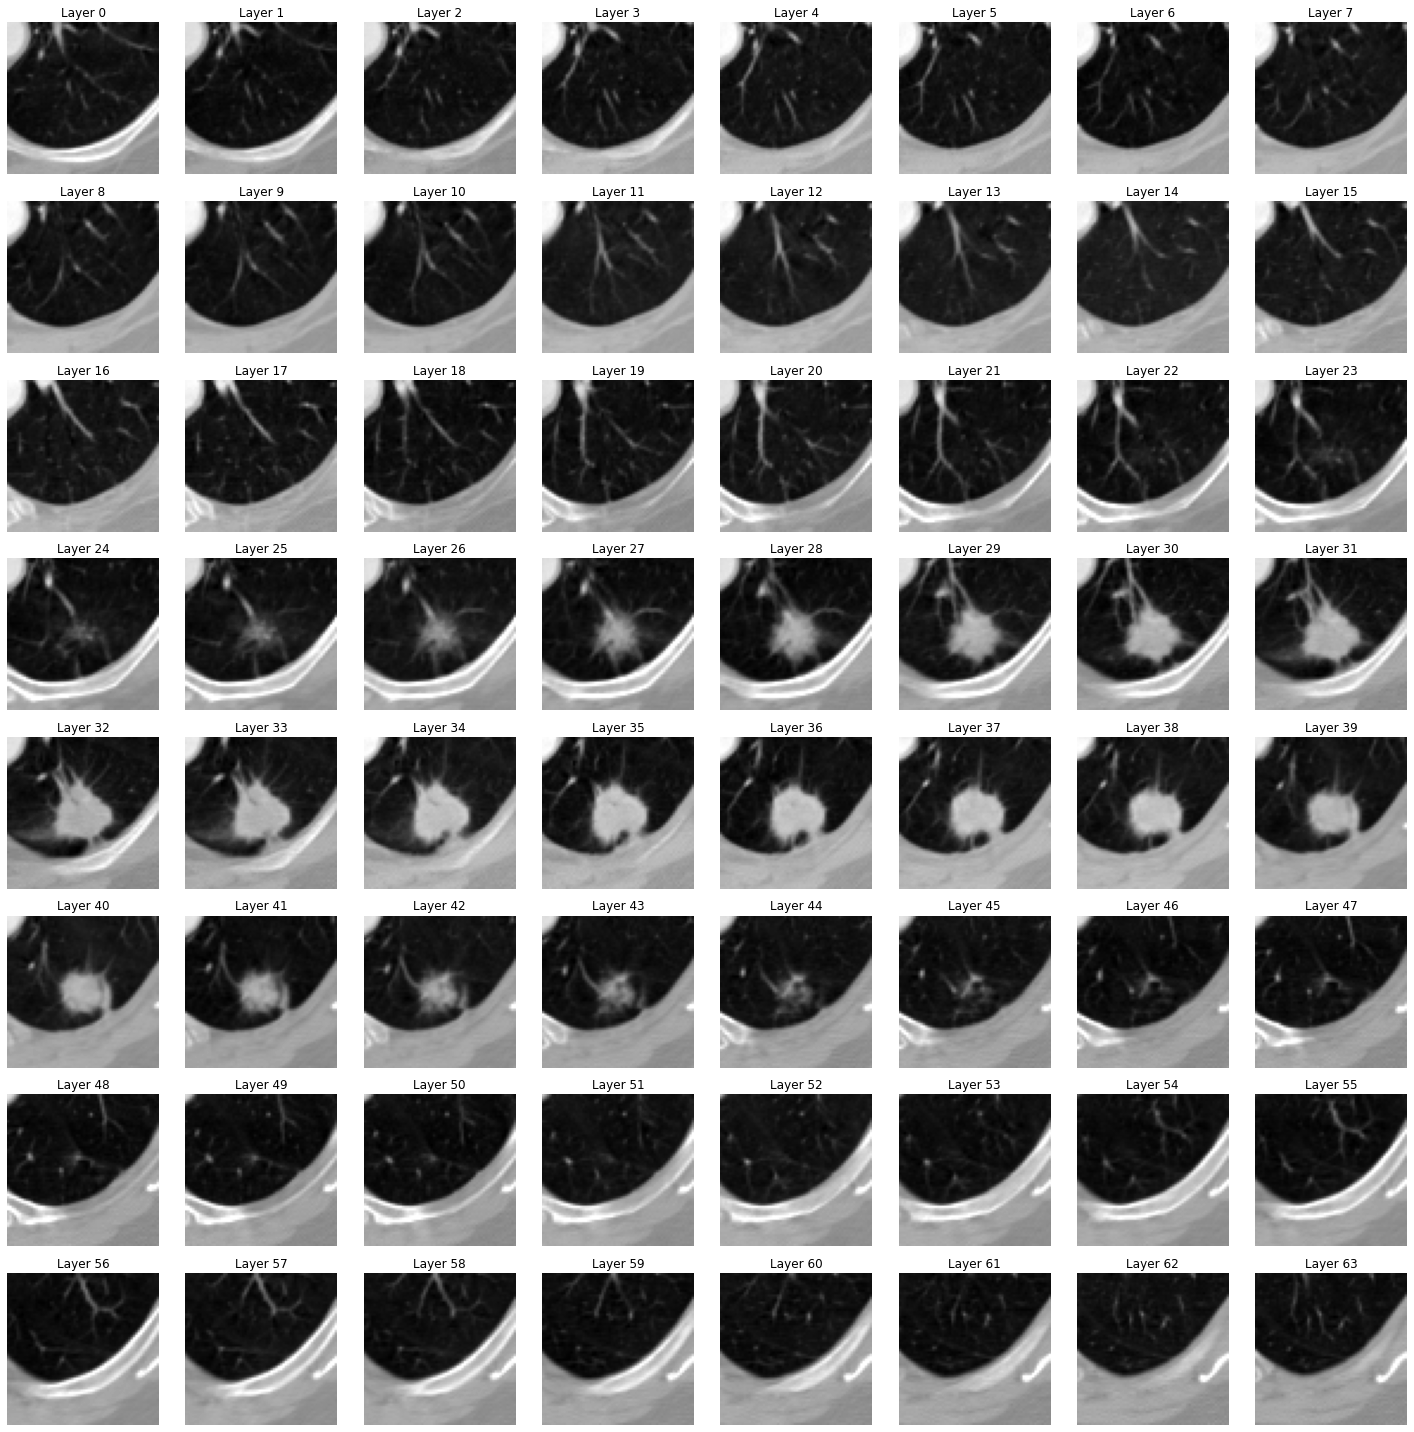

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load your 3D image from the npy file
#image = np.load('your_image.npy')
image_file_name=r"E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_roi.npy"
mask_file_name=r"E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_mask.npy"
# Load the 3D image and mask
image = np.load(image_file_name)
mask = np.load(mask_file_name)
# Display each layer of the image
num_layers = image.shape[2]  # Assuming the depth is along the third axis
fig, axes = plt.subplots(8, 8, figsize=(20, 20))  # Adjust the size as needed

for i in range(num_layers):
    row = i // 8
    col = i % 8
    axes[row, col].imshow(image[:, :, i], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Layer {i}')

plt.tight_layout()
plt.show()

In [99]:
import os
import random

# Set the directory path
directory_path = r"E:/My work/Nodule_crop/"

# Get a list of all folders in the directory
folders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

# Set the number of folders to select
n = 5  # Change this value to the desired number of folders

# Shuffle the list of folders
random.shuffle(folders)

# Select the first n folders
selected_folders = folders[:n]

# Print the selected folders
for folder in selected_folders:
    print(folder)


LIDC-IDRI-0895
LIDC-IDRI-0815
LIDC-IDRI-0635
LIDC-IDRI-0251
LIDC-IDRI-0073


In [113]:
import os

# Set the directory path
directory_path = r"E:/My work/Nodule_crop/"
folders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]
# Loop through all files in the directory
for folder in folders:
    for filename in os.listdir(os.path.join(directory_path,folder)):
        # Check if the file name matches the pattern "LIDC-IDRI-*_*_label.npy"
        if filename.startswith("LIDC-IDRI-") and filename.endswith("_label.npy"):
            # Extract the parts of the filename
            parts = filename.split("_")
            prefix = "_".join(parts[:-2])
            index = parts[-2]

            # Construct the new filename with "_mask" instead of "_label"
            new_filename = f"{prefix}_{index}_mask.npy"

            # Join the directory path and filenames
            old_path = os.path.join(directory_path, folder,filename)
            new_path = os.path.join(directory_path,folder, new_filename)

            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed {filename} to {new_filename}")

Renamed LIDC-IDRI-0001_1_label.npy to LIDC-IDRI-0001_1_mask.npy
Renamed LIDC-IDRI-0002_1_label.npy to LIDC-IDRI-0002_1_mask.npy
Renamed LIDC-IDRI-0003_1_label.npy to LIDC-IDRI-0003_1_mask.npy
Renamed LIDC-IDRI-0003_2_label.npy to LIDC-IDRI-0003_2_mask.npy
Renamed LIDC-IDRI-0003_3_label.npy to LIDC-IDRI-0003_3_mask.npy
Renamed LIDC-IDRI-0004_1_label.npy to LIDC-IDRI-0004_1_mask.npy
Renamed LIDC-IDRI-0005_1_label.npy to LIDC-IDRI-0005_1_mask.npy
Renamed LIDC-IDRI-0005_2_label.npy to LIDC-IDRI-0005_2_mask.npy
Renamed LIDC-IDRI-0006_1_label.npy to LIDC-IDRI-0006_1_mask.npy
Renamed LIDC-IDRI-0006_2_label.npy to LIDC-IDRI-0006_2_mask.npy
Renamed LIDC-IDRI-0007_1_label.npy to LIDC-IDRI-0007_1_mask.npy
Renamed LIDC-IDRI-0008_1_label.npy to LIDC-IDRI-0008_1_mask.npy
Renamed LIDC-IDRI-0008_2_label.npy to LIDC-IDRI-0008_2_mask.npy
Renamed LIDC-IDRI-0010_1_label.npy to LIDC-IDRI-0010_1_mask.npy
Renamed LIDC-IDRI-0010_2_label.npy to LIDC-IDRI-0010_2_mask.npy
Renamed LIDC-IDRI-0011_1_label.npy to LI

Renamed LIDC-IDRI-0061_1_label.npy to LIDC-IDRI-0061_1_mask.npy
Renamed LIDC-IDRI-0061_2_label.npy to LIDC-IDRI-0061_2_mask.npy
Renamed LIDC-IDRI-0061_3_label.npy to LIDC-IDRI-0061_3_mask.npy
Renamed LIDC-IDRI-0061_4_label.npy to LIDC-IDRI-0061_4_mask.npy
Renamed LIDC-IDRI-0061_5_label.npy to LIDC-IDRI-0061_5_mask.npy
Renamed LIDC-IDRI-0063_1_label.npy to LIDC-IDRI-0063_1_mask.npy
Renamed LIDC-IDRI-0063_2_label.npy to LIDC-IDRI-0063_2_mask.npy
Renamed LIDC-IDRI-0063_3_label.npy to LIDC-IDRI-0063_3_mask.npy
Renamed LIDC-IDRI-0065_1_label.npy to LIDC-IDRI-0065_1_mask.npy
Renamed LIDC-IDRI-0066_1_label.npy to LIDC-IDRI-0066_1_mask.npy
Renamed LIDC-IDRI-0066_2_label.npy to LIDC-IDRI-0066_2_mask.npy
Renamed LIDC-IDRI-0066_3_label.npy to LIDC-IDRI-0066_3_mask.npy
Renamed LIDC-IDRI-0067_1_label.npy to LIDC-IDRI-0067_1_mask.npy
Renamed LIDC-IDRI-0067_2_label.npy to LIDC-IDRI-0067_2_mask.npy
Renamed LIDC-IDRI-0067_3_label.npy to LIDC-IDRI-0067_3_mask.npy
Renamed LIDC-IDRI-0067_4_label.npy to LI

Renamed LIDC-IDRI-0160_1_label.npy to LIDC-IDRI-0160_1_mask.npy
Renamed LIDC-IDRI-0160_2_label.npy to LIDC-IDRI-0160_2_mask.npy
Renamed LIDC-IDRI-0160_3_label.npy to LIDC-IDRI-0160_3_mask.npy
Renamed LIDC-IDRI-0160_4_label.npy to LIDC-IDRI-0160_4_mask.npy
Renamed LIDC-IDRI-0161_1_label.npy to LIDC-IDRI-0161_1_mask.npy
Renamed LIDC-IDRI-0161_2_label.npy to LIDC-IDRI-0161_2_mask.npy
Renamed LIDC-IDRI-0161_3_label.npy to LIDC-IDRI-0161_3_mask.npy
Renamed LIDC-IDRI-0162_1_label.npy to LIDC-IDRI-0162_1_mask.npy
Renamed LIDC-IDRI-0163_1_label.npy to LIDC-IDRI-0163_1_mask.npy
Renamed LIDC-IDRI-0166_1_label.npy to LIDC-IDRI-0166_1_mask.npy
Renamed LIDC-IDRI-0167_1_label.npy to LIDC-IDRI-0167_1_mask.npy
Renamed LIDC-IDRI-0167_2_label.npy to LIDC-IDRI-0167_2_mask.npy
Renamed LIDC-IDRI-0167_3_label.npy to LIDC-IDRI-0167_3_mask.npy
Renamed LIDC-IDRI-0168_1_label.npy to LIDC-IDRI-0168_1_mask.npy
Renamed LIDC-IDRI-0168_2_label.npy to LIDC-IDRI-0168_2_mask.npy
Renamed LIDC-IDRI-0169_1_label.npy to LI

Renamed LIDC-IDRI-0248_1_label.npy to LIDC-IDRI-0248_1_mask.npy
Renamed LIDC-IDRI-0249_1_label.npy to LIDC-IDRI-0249_1_mask.npy
Renamed LIDC-IDRI-0249_2_label.npy to LIDC-IDRI-0249_2_mask.npy
Renamed LIDC-IDRI-0251_1_label.npy to LIDC-IDRI-0251_1_mask.npy
Renamed LIDC-IDRI-0252_1_label.npy to LIDC-IDRI-0252_1_mask.npy
Renamed LIDC-IDRI-0254_1_label.npy to LIDC-IDRI-0254_1_mask.npy
Renamed LIDC-IDRI-0254_2_label.npy to LIDC-IDRI-0254_2_mask.npy
Renamed LIDC-IDRI-0254_3_label.npy to LIDC-IDRI-0254_3_mask.npy
Renamed LIDC-IDRI-0255_1_label.npy to LIDC-IDRI-0255_1_mask.npy
Renamed LIDC-IDRI-0255_2_label.npy to LIDC-IDRI-0255_2_mask.npy
Renamed LIDC-IDRI-0256_1_label.npy to LIDC-IDRI-0256_1_mask.npy
Renamed LIDC-IDRI-0257_1_label.npy to LIDC-IDRI-0257_1_mask.npy
Renamed LIDC-IDRI-0258_1_label.npy to LIDC-IDRI-0258_1_mask.npy
Renamed LIDC-IDRI-0258_2_label.npy to LIDC-IDRI-0258_2_mask.npy
Renamed LIDC-IDRI-0259_1_label.npy to LIDC-IDRI-0259_1_mask.npy
Renamed LIDC-IDRI-0260_1_label.npy to LI

Renamed LIDC-IDRI-0360_3_label.npy to LIDC-IDRI-0360_3_mask.npy
Renamed LIDC-IDRI-0360_4_label.npy to LIDC-IDRI-0360_4_mask.npy
Renamed LIDC-IDRI-0362_1_label.npy to LIDC-IDRI-0362_1_mask.npy
Renamed LIDC-IDRI-0365_1_label.npy to LIDC-IDRI-0365_1_mask.npy
Renamed LIDC-IDRI-0366_1_label.npy to LIDC-IDRI-0366_1_mask.npy
Renamed LIDC-IDRI-0369_1_label.npy to LIDC-IDRI-0369_1_mask.npy
Renamed LIDC-IDRI-0371_1_label.npy to LIDC-IDRI-0371_1_mask.npy
Renamed LIDC-IDRI-0375_1_label.npy to LIDC-IDRI-0375_1_mask.npy
Renamed LIDC-IDRI-0375_2_label.npy to LIDC-IDRI-0375_2_mask.npy
Renamed LIDC-IDRI-0376_1_label.npy to LIDC-IDRI-0376_1_mask.npy
Renamed LIDC-IDRI-0376_2_label.npy to LIDC-IDRI-0376_2_mask.npy
Renamed LIDC-IDRI-0377_1_label.npy to LIDC-IDRI-0377_1_mask.npy
Renamed LIDC-IDRI-0377_2_label.npy to LIDC-IDRI-0377_2_mask.npy
Renamed LIDC-IDRI-0378_1_label.npy to LIDC-IDRI-0378_1_mask.npy
Renamed LIDC-IDRI-0379_1_label.npy to LIDC-IDRI-0379_1_mask.npy
Renamed LIDC-IDRI-0379_2_label.npy to LI

Renamed LIDC-IDRI-0463_1_label.npy to LIDC-IDRI-0463_1_mask.npy
Renamed LIDC-IDRI-0463_2_label.npy to LIDC-IDRI-0463_2_mask.npy
Renamed LIDC-IDRI-0466_1_label.npy to LIDC-IDRI-0466_1_mask.npy
Renamed LIDC-IDRI-0466_2_label.npy to LIDC-IDRI-0466_2_mask.npy
Renamed LIDC-IDRI-0466_3_label.npy to LIDC-IDRI-0466_3_mask.npy
Renamed LIDC-IDRI-0467_1_label.npy to LIDC-IDRI-0467_1_mask.npy
Renamed LIDC-IDRI-0468_1_label.npy to LIDC-IDRI-0468_1_mask.npy
Renamed LIDC-IDRI-0469_1_label.npy to LIDC-IDRI-0469_1_mask.npy
Renamed LIDC-IDRI-0469_2_label.npy to LIDC-IDRI-0469_2_mask.npy
Renamed LIDC-IDRI-0469_3_label.npy to LIDC-IDRI-0469_3_mask.npy
Renamed LIDC-IDRI-0469_4_label.npy to LIDC-IDRI-0469_4_mask.npy
Renamed LIDC-IDRI-0474_1_label.npy to LIDC-IDRI-0474_1_mask.npy
Renamed LIDC-IDRI-0474_2_label.npy to LIDC-IDRI-0474_2_mask.npy
Renamed LIDC-IDRI-0474_3_label.npy to LIDC-IDRI-0474_3_mask.npy
Renamed LIDC-IDRI-0474_4_label.npy to LIDC-IDRI-0474_4_mask.npy
Renamed LIDC-IDRI-0474_5_label.npy to LI

Renamed LIDC-IDRI-0577_1_label.npy to LIDC-IDRI-0577_1_mask.npy
Renamed LIDC-IDRI-0577_2_label.npy to LIDC-IDRI-0577_2_mask.npy
Renamed LIDC-IDRI-0577_3_label.npy to LIDC-IDRI-0577_3_mask.npy
Renamed LIDC-IDRI-0578_1_label.npy to LIDC-IDRI-0578_1_mask.npy
Renamed LIDC-IDRI-0579_1_label.npy to LIDC-IDRI-0579_1_mask.npy
Renamed LIDC-IDRI-0580_1_label.npy to LIDC-IDRI-0580_1_mask.npy
Renamed LIDC-IDRI-0582_1_label.npy to LIDC-IDRI-0582_1_mask.npy
Renamed LIDC-IDRI-0582_2_label.npy to LIDC-IDRI-0582_2_mask.npy
Renamed LIDC-IDRI-0582_3_label.npy to LIDC-IDRI-0582_3_mask.npy
Renamed LIDC-IDRI-0582_4_label.npy to LIDC-IDRI-0582_4_mask.npy
Renamed LIDC-IDRI-0582_5_label.npy to LIDC-IDRI-0582_5_mask.npy
Renamed LIDC-IDRI-0582_6_label.npy to LIDC-IDRI-0582_6_mask.npy
Renamed LIDC-IDRI-0582_7_label.npy to LIDC-IDRI-0582_7_mask.npy
Renamed LIDC-IDRI-0583_10_label.npy to LIDC-IDRI-0583_10_mask.npy
Renamed LIDC-IDRI-0583_1_label.npy to LIDC-IDRI-0583_1_mask.npy
Renamed LIDC-IDRI-0583_2_label.npy to 

Renamed LIDC-IDRI-0666_1_label.npy to LIDC-IDRI-0666_1_mask.npy
Renamed LIDC-IDRI-0669_1_label.npy to LIDC-IDRI-0669_1_mask.npy
Renamed LIDC-IDRI-0672_1_label.npy to LIDC-IDRI-0672_1_mask.npy
Renamed LIDC-IDRI-0673_1_label.npy to LIDC-IDRI-0673_1_mask.npy
Renamed LIDC-IDRI-0673_2_label.npy to LIDC-IDRI-0673_2_mask.npy
Renamed LIDC-IDRI-0673_3_label.npy to LIDC-IDRI-0673_3_mask.npy
Renamed LIDC-IDRI-0674_1_label.npy to LIDC-IDRI-0674_1_mask.npy
Renamed LIDC-IDRI-0674_2_label.npy to LIDC-IDRI-0674_2_mask.npy
Renamed LIDC-IDRI-0676_1_label.npy to LIDC-IDRI-0676_1_mask.npy
Renamed LIDC-IDRI-0678_1_label.npy to LIDC-IDRI-0678_1_mask.npy
Renamed LIDC-IDRI-0681_1_label.npy to LIDC-IDRI-0681_1_mask.npy
Renamed LIDC-IDRI-0682_1_label.npy to LIDC-IDRI-0682_1_mask.npy
Renamed LIDC-IDRI-0682_2_label.npy to LIDC-IDRI-0682_2_mask.npy
Renamed LIDC-IDRI-0682_3_label.npy to LIDC-IDRI-0682_3_mask.npy
Renamed LIDC-IDRI-0687_1_label.npy to LIDC-IDRI-0687_1_mask.npy
Renamed LIDC-IDRI-0694_1_label.npy to LI

Renamed LIDC-IDRI-0776_1_label.npy to LIDC-IDRI-0776_1_mask.npy
Renamed LIDC-IDRI-0776_2_label.npy to LIDC-IDRI-0776_2_mask.npy
Renamed LIDC-IDRI-0776_3_label.npy to LIDC-IDRI-0776_3_mask.npy
Renamed LIDC-IDRI-0777_1_label.npy to LIDC-IDRI-0777_1_mask.npy
Renamed LIDC-IDRI-0777_2_label.npy to LIDC-IDRI-0777_2_mask.npy
Renamed LIDC-IDRI-0777_3_label.npy to LIDC-IDRI-0777_3_mask.npy
Renamed LIDC-IDRI-0777_4_label.npy to LIDC-IDRI-0777_4_mask.npy
Renamed LIDC-IDRI-0777_5_label.npy to LIDC-IDRI-0777_5_mask.npy
Renamed LIDC-IDRI-0777_6_label.npy to LIDC-IDRI-0777_6_mask.npy
Renamed LIDC-IDRI-0779_1_label.npy to LIDC-IDRI-0779_1_mask.npy
Renamed LIDC-IDRI-0783_1_label.npy to LIDC-IDRI-0783_1_mask.npy
Renamed LIDC-IDRI-0787_1_label.npy to LIDC-IDRI-0787_1_mask.npy
Renamed LIDC-IDRI-0787_2_label.npy to LIDC-IDRI-0787_2_mask.npy
Renamed LIDC-IDRI-0788_1_label.npy to LIDC-IDRI-0788_1_mask.npy
Renamed LIDC-IDRI-0788_2_label.npy to LIDC-IDRI-0788_2_mask.npy
Renamed LIDC-IDRI-0788_3_label.npy to LI

Renamed LIDC-IDRI-0860_1_label.npy to LIDC-IDRI-0860_1_mask.npy
Renamed LIDC-IDRI-0860_2_label.npy to LIDC-IDRI-0860_2_mask.npy
Renamed LIDC-IDRI-0861_1_label.npy to LIDC-IDRI-0861_1_mask.npy
Renamed LIDC-IDRI-0861_2_label.npy to LIDC-IDRI-0861_2_mask.npy
Renamed LIDC-IDRI-0863_1_label.npy to LIDC-IDRI-0863_1_mask.npy
Renamed LIDC-IDRI-0863_2_label.npy to LIDC-IDRI-0863_2_mask.npy
Renamed LIDC-IDRI-0865_1_label.npy to LIDC-IDRI-0865_1_mask.npy
Renamed LIDC-IDRI-0866_1_label.npy to LIDC-IDRI-0866_1_mask.npy
Renamed LIDC-IDRI-0866_2_label.npy to LIDC-IDRI-0866_2_mask.npy
Renamed LIDC-IDRI-0866_3_label.npy to LIDC-IDRI-0866_3_mask.npy
Renamed LIDC-IDRI-0866_4_label.npy to LIDC-IDRI-0866_4_mask.npy
Renamed LIDC-IDRI-0867_1_label.npy to LIDC-IDRI-0867_1_mask.npy
Renamed LIDC-IDRI-0867_2_label.npy to LIDC-IDRI-0867_2_mask.npy
Renamed LIDC-IDRI-0869_1_label.npy to LIDC-IDRI-0869_1_mask.npy
Renamed LIDC-IDRI-0869_2_label.npy to LIDC-IDRI-0869_2_mask.npy
Renamed LIDC-IDRI-0869_3_label.npy to LI

Renamed LIDC-IDRI-0957_1_label.npy to LIDC-IDRI-0957_1_mask.npy
Renamed LIDC-IDRI-0957_2_label.npy to LIDC-IDRI-0957_2_mask.npy
Renamed LIDC-IDRI-0961_1_label.npy to LIDC-IDRI-0961_1_mask.npy
Renamed LIDC-IDRI-0961_2_label.npy to LIDC-IDRI-0961_2_mask.npy
Renamed LIDC-IDRI-0961_3_label.npy to LIDC-IDRI-0961_3_mask.npy
Renamed LIDC-IDRI-0961_4_label.npy to LIDC-IDRI-0961_4_mask.npy
Renamed LIDC-IDRI-0961_5_label.npy to LIDC-IDRI-0961_5_mask.npy
Renamed LIDC-IDRI-0961_6_label.npy to LIDC-IDRI-0961_6_mask.npy
Renamed LIDC-IDRI-0963_1_label.npy to LIDC-IDRI-0963_1_mask.npy
Renamed LIDC-IDRI-0966_1_label.npy to LIDC-IDRI-0966_1_mask.npy
Renamed LIDC-IDRI-0966_2_label.npy to LIDC-IDRI-0966_2_mask.npy
Renamed LIDC-IDRI-0966_3_label.npy to LIDC-IDRI-0966_3_mask.npy
Renamed LIDC-IDRI-0968_1_label.npy to LIDC-IDRI-0968_1_mask.npy
Renamed LIDC-IDRI-0969_1_label.npy to LIDC-IDRI-0969_1_mask.npy
Renamed LIDC-IDRI-0969_2_label.npy to LIDC-IDRI-0969_2_mask.npy
Renamed LIDC-IDRI-0969_3_label.npy to LI

In [2]:
import numpy as np
from scipy import ndimage
def Rotate_1(image):
    # Define the rotation angles (in degrees)
    angle_x = 180  # Rotation angle around the x-axis
    angle_y = 0  # Rotation angle around the y-axis
    angle_z = 0   # Rotation angle around the z-axis

# Rotate the image
    rotated_image = ndimage.rotate(image, angle_x, axes=(1, 2), reshape=False, order=3)
    rotated_image = ndimage.rotate(rotated_image, angle_y, axes=(0, 2), reshape=False, order=3)
    rotated_image = ndimage.rotate(rotated_image, angle_z, axes=(0, 1), reshape=False, order=3)
    return rotated_image

def Rotate_2(image):
    # Define the rotation angles (in degrees)
    angle_x = 0  # Rotation angle around the x-axis
    angle_y = 180  # Rotation angle around the y-axis
    angle_z = 0   # Rotation angle around the z-axis

# Rotate the image
    rotated_image = ndimage.rotate(image, angle_x, axes=(1, 2), reshape=False, order=3)
    rotated_image = ndimage.rotate(rotated_image, angle_y, axes=(0, 2), reshape=False, order=3)
    rotated_image = ndimage.rotate(rotated_image, angle_z, axes=(0, 1), reshape=False, order=3)
    return rotated_image

def Rotate_3(image):
    # Define the rotation angles (in degrees)
    angle_x = 180  # Rotation angle around the x-axis
    angle_y = 180  # Rotation angle around the y-axis
    angle_z = 0   # Rotation angle around the z-axis

# Rotate the image
    rotated_image = ndimage.rotate(image, angle_x, axes=(1, 2), reshape=False, order=3)
    rotated_image = ndimage.rotate(rotated_image, angle_y, axes=(0, 2), reshape=False, order=3)
    rotated_image = ndimage.rotate(rotated_image, angle_z, axes=(0, 1), reshape=False, order=3)
    return rotated_image



directory_path = r"E:\Final Project Work\DataSet Files\Nodule_crop"
    #list_path = r'.\GGO_DataSet\test_data\test.csv'
error_file="Error_list_augment.txt"
label_file="GFG.csv"
    # f = open(list_path)
data = pd.read_csv(label_file)

train_patients = [os.path.join(directory_path,name) for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
train_patients = sorted(train_patients)
    #print(train_patients)
   
file_names_list=[]
malignancy_list=[]
for patients in tqdm(train_patients):
        #sleep(0.01)
        
        dcm_File = patients[-14:]
        count=(len([entry for entry in os.listdir(patients) if os.path.isfile(os.path.join(patients, entry))]))
        try:

            for i in range(1,int(count/2)+1):
                roi_path = directory_path+'/'+dcm_File+"/"+dcm_File+'_'+str(i)+'_roi.npy'
                img=np.load(roi_path)
                           
                mask_path = directory_path+'/'+dcm_File+"/"+dcm_File+'_'+str(i)+'_label.npy'
                msk=np.load(mask_path)
                               
                #print(features)
                p_name=dcm_File+'_'+str(i)+'_roi.npy'
                malignancy=  data.loc[data['ROI Image Name'] == p_name].Malignancy
                
                if malignancy.any() != 0:
                    print(patients[-14:])
                    # image1=Rotate_1(img)
                    # mask1=Rotate_1(msk)
                    # image2=Rotate_2(img)
                    # mask2=Rotate_2(msk)
                    # image3=Rotate_3(img)
                    # mask3=Rotate_3(msk)
                    # P_name1=dcm_File+'_agumt1_'+str(i)+'_roi.npy'
                    # P_Mask1=dcm_File+'_agumt1_'+str(i)+'_mask.npy'
                    # P_name2=dcm_File+'_agumt2_'+str(i)+'_roi.npy'
                    # P_mask2=dcm_File+'_agumt2_'+str(i)+'_mask.npy'
                    # P_name3=dcm_File+'_agumt3_'+str(i)+'_roi.npy'
                    # P_mask3=dcm_File+'_agumt3_'+str(i)+'_mask.npy'
                    # np.save(directory_path+'/'+dcm_File+"/"+P_name1,image1)
                    # np.save(directory_path+'/'+dcm_File+"/"+P_Mask1,mask1)
                    # np.save(directory_path+'/'+dcm_File+"/"+P_name2,image2)
                    # np.save(directory_path+'/'+dcm_File+"/"+P_mask2,mask2)
                    # np.save(directory_path+'/'+dcm_File+"/"+P_name3,image3)
                    # np.save(directory_path+'/'+dcm_File+"/"+P_mask3,mask3)
                    rotations = {
                        1: Rotate_1,
                        2: Rotate_2,
                        3: Rotate_3
                        }

                    for rot_num, rotate_func in rotations.items():
                        image = rotate_func(img)
                        mask = rotate_func(msk)
                        P_name = f"{dcm_File}_agumt{rot_num}_{i}_roi.npy"
                        P_mask = f"{dcm_File}_agumt{rot_num}_{i}_label.npy"
                        np.save(f"{directory_path}/{dcm_File}/{P_name}", image)
                        np.save(f"{directory_path}/{dcm_File}/{P_mask}", mask)
                        file_names_list.append(P_name)
                        file_names_list.append(P_mask)
                        

                    
        except Exception as Error:
            with open('Error_list_augment.txt', 'a') as error_file:
                print(patients[-14:])
                print("Error: "+dcm_File+":"+str(Error)+"\n")
            continue
for i in file_names_list:
    malignancy_list.append(1)

new_data = {
    'ROI Image Name': file_names_list,
    'Malignancy': malignancy_list  # Example values
}
# Convert new data to DataFrame
new_df = pd.DataFrame(new_data)

# Concatenate the original DataFrame and the new DataFrame
merged_df = pd.concat([data, new_df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
new_label_file = r"GFG_with_new_data.csv"
merged_df.to_csv(new_label_file, index=True)
                    
                    

  0%|          | 0/611 [00:00<?, ?it/s]

LIDC-IDRI-0001


  0%|          | 1/611 [00:00<06:37,  1.53it/s]

LIDC-IDRI-0002


  0%|          | 2/611 [00:01<07:06,  1.43it/s]

LIDC-IDRI-0003
LIDC-IDRI-0003


  0%|          | 3/611 [00:02<10:17,  1.02s/it]

LIDC-IDRI-0007


  2%|▏         | 10/611 [00:03<02:28,  4.04it/s]

LIDC-IDRI-0012


  2%|▏         | 11/611 [00:04<03:31,  2.84it/s]

LIDC-IDRI-0013
LIDC-IDRI-0013


  2%|▏         | 12/611 [00:05<05:20,  1.87it/s]

LIDC-IDRI-0014


  2%|▏         | 13/611 [00:06<05:41,  1.75it/s]

LIDC-IDRI-0016
LIDC-IDRI-0016


  2%|▏         | 14/611 [00:07<07:12,  1.38it/s]

LIDC-IDRI-0018


  2%|▏         | 15/611 [00:08<07:22,  1.35it/s]

LIDC-IDRI-0020


  3%|▎         | 16/611 [00:09<07:14,  1.37it/s]

LIDC-IDRI-0023


  3%|▎         | 18/611 [00:09<05:25,  1.82it/s]

LIDC-IDRI-0024


  4%|▎         | 22/611 [00:10<03:07,  3.13it/s]

LIDC-IDRI-0037
LIDC-IDRI-0037


  4%|▍         | 26/611 [00:11<03:06,  3.14it/s]

LIDC-IDRI-0041


  5%|▍         | 29/611 [00:12<02:53,  3.35it/s]

LIDC-IDRI-0042


  5%|▍         | 30/611 [00:13<03:24,  2.84it/s]

LIDC-IDRI-0043


  5%|▌         | 31/611 [00:14<03:53,  2.48it/s]

LIDC-IDRI-0044


  5%|▌         | 32/611 [00:14<04:28,  2.16it/s]

LIDC-IDRI-0047


  6%|▌         | 34/611 [00:15<04:09,  2.31it/s]

LIDC-IDRI-0048


  6%|▌         | 35/611 [00:16<04:37,  2.07it/s]

LIDC-IDRI-0049


  6%|▌         | 36/611 [00:16<05:18,  1.80it/s]

LIDC-IDRI-0050


  6%|▌         | 37/611 [00:17<05:28,  1.75it/s]

LIDC-IDRI-0051


  6%|▌         | 38/611 [00:18<05:40,  1.68it/s]

LIDC-IDRI-0052


  6%|▋         | 39/611 [00:18<05:57,  1.60it/s]

LIDC-IDRI-0054


  7%|▋         | 40/611 [00:19<05:56,  1.60it/s]

LIDC-IDRI-0055
LIDC-IDRI-0055
LIDC-IDRI-0055


  7%|▋         | 41/611 [00:21<09:30,  1.00s/it]

LIDC-IDRI-0057


  7%|▋         | 42/611 [00:22<08:37,  1.10it/s]

LIDC-IDRI-0058
LIDC-IDRI-0058


  7%|▋         | 43/611 [00:23<09:34,  1.01s/it]

LIDC-IDRI-0059


  7%|▋         | 44/611 [00:24<08:21,  1.13it/s]

LIDC-IDRI-0060
LIDC-IDRI-0060
LIDC-IDRI-0060
LIDC-IDRI-0060
LIDC-IDRI-0060


  7%|▋         | 45/611 [00:27<14:39,  1.55s/it]

LIDC-IDRI-0061


  8%|▊         | 46/611 [00:27<12:03,  1.28s/it]

LIDC-IDRI-0063
LIDC-IDRI-0063


  8%|▊         | 47/611 [00:29<12:04,  1.28s/it]

LIDC-IDRI-0066
LIDC-IDRI-0066
LIDC-IDRI-0066


  8%|▊         | 49/611 [00:30<10:28,  1.12s/it]

LIDC-IDRI-0067


  8%|▊         | 50/611 [00:31<09:33,  1.02s/it]

LIDC-IDRI-0068
LIDC-IDRI-0068
LIDC-IDRI-0068


  8%|▊         | 51/611 [00:33<11:40,  1.25s/it]

LIDC-IDRI-0074


  9%|▉         | 54/611 [00:34<06:32,  1.42it/s]

LIDC-IDRI-0075


  9%|▉         | 55/611 [00:34<06:26,  1.44it/s]

LIDC-IDRI-0077


  9%|▉         | 57/611 [00:35<05:13,  1.77it/s]

LIDC-IDRI-0080
LIDC-IDRI-0080


  9%|▉         | 58/611 [00:36<06:24,  1.44it/s]

LIDC-IDRI-0081
LIDC-IDRI-0081


 10%|▉         | 59/611 [00:38<07:34,  1.21it/s]

LIDC-IDRI-0082


 10%|▉         | 60/611 [00:38<07:00,  1.31it/s]

LIDC-IDRI-0087


 10%|█         | 63/611 [00:39<04:41,  1.94it/s]

LIDC-IDRI-0089


 11%|█         | 68/611 [00:40<02:31,  3.58it/s]

LIDC-IDRI-0094


 11%|█▏        | 70/611 [00:40<02:35,  3.49it/s]

LIDC-IDRI-0095


 12%|█▏        | 71/611 [00:41<03:15,  2.76it/s]

LIDC-IDRI-0096


 12%|█▏        | 72/611 [00:42<03:39,  2.45it/s]

LIDC-IDRI-0099


 12%|█▏        | 74/611 [00:42<03:19,  2.69it/s]

LIDC-IDRI-0104


 12%|█▏        | 76/611 [00:43<03:17,  2.71it/s]

LIDC-IDRI-0109


 13%|█▎        | 79/611 [00:44<02:41,  3.28it/s]

LIDC-IDRI-0110


 13%|█▎        | 80/611 [00:44<03:17,  2.69it/s]

LIDC-IDRI-0112


 13%|█▎        | 81/611 [00:45<03:48,  2.32it/s]

LIDC-IDRI-0114


 14%|█▎        | 83/611 [00:46<03:28,  2.54it/s]

LIDC-IDRI-0121
LIDC-IDRI-0121


 14%|█▍        | 88/611 [00:47<02:43,  3.20it/s]

LIDC-IDRI-0132
LIDC-IDRI-0132


 15%|█▌        | 92/611 [00:48<02:45,  3.14it/s]

LIDC-IDRI-0135


 15%|█▌        | 94/611 [00:49<02:54,  2.96it/s]

LIDC-IDRI-0137
LIDC-IDRI-0137


 16%|█▌        | 95/611 [00:51<04:06,  2.09it/s]

LIDC-IDRI-0139
LIDC-IDRI-0139
LIDC-IDRI-0139


 16%|█▌        | 98/611 [00:53<04:26,  1.92it/s]

LIDC-IDRI-0146


 16%|█▋        | 100/611 [00:53<03:58,  2.14it/s]

LIDC-IDRI-0148


 17%|█▋        | 101/611 [00:54<04:12,  2.02it/s]

LIDC-IDRI-0151


 17%|█▋        | 102/611 [00:55<04:21,  1.94it/s]

LIDC-IDRI-0156


 17%|█▋        | 104/611 [00:55<03:47,  2.23it/s]

LIDC-IDRI-0159


 17%|█▋        | 106/611 [00:56<03:24,  2.46it/s]

LIDC-IDRI-0160


 18%|█▊        | 107/611 [00:57<03:47,  2.21it/s]

LIDC-IDRI-0163


 18%|█▊        | 113/611 [00:57<01:52,  4.42it/s]

LIDC-IDRI-0169
LIDC-IDRI-0170
LIDC-IDRI-0170


 19%|█▉        | 115/611 [00:59<03:28,  2.37it/s]

LIDC-IDRI-0172


 19%|█▉        | 116/611 [01:00<03:48,  2.16it/s]

LIDC-IDRI-0176


 19%|█▉        | 118/611 [01:01<03:23,  2.43it/s]

LIDC-IDRI-0179


 20%|█▉        | 120/611 [01:01<03:12,  2.54it/s]

LIDC-IDRI-0181
LIDC-IDRI-0181


 20%|█▉        | 121/611 [01:03<04:33,  1.79it/s]

LIDC-IDRI-0183


 21%|██        | 126/611 [01:03<02:23,  3.39it/s]

LIDC-IDRI-0188


 21%|██        | 128/611 [01:04<02:31,  3.19it/s]

LIDC-IDRI-0190
LIDC-IDRI-0190


 21%|██        | 129/611 [01:05<03:49,  2.10it/s]

LIDC-IDRI-0191


 21%|██▏       | 130/611 [01:06<04:07,  1.94it/s]

LIDC-IDRI-0194
LIDC-IDRI-0194
LIDC-IDRI-0194


 22%|██▏       | 133/611 [01:08<04:31,  1.76it/s]

LIDC-IDRI-0196


 22%|██▏       | 134/611 [01:08<04:32,  1.75it/s]

LIDC-IDRI-0201


 23%|██▎       | 138/611 [01:09<02:53,  2.72it/s]

LIDC-IDRI-0203


 23%|██▎       | 140/611 [01:10<02:53,  2.72it/s]

LIDC-IDRI-0204


 23%|██▎       | 141/611 [01:10<03:10,  2.46it/s]

LIDC-IDRI-0206


 23%|██▎       | 142/611 [01:11<03:29,  2.24it/s]

LIDC-IDRI-0208


 23%|██▎       | 143/611 [01:12<04:02,  1.93it/s]

LIDC-IDRI-0210


 24%|██▎       | 144/611 [01:13<04:18,  1.81it/s]

LIDC-IDRI-0216


 24%|██▍       | 147/611 [01:13<03:00,  2.57it/s]

LIDC-IDRI-0217
LIDC-IDRI-0217
LIDC-IDRI-0217


 24%|██▍       | 148/611 [01:15<05:16,  1.46it/s]

LIDC-IDRI-0219


 24%|██▍       | 149/611 [01:16<05:12,  1.48it/s]

LIDC-IDRI-0222


 25%|██▍       | 151/611 [01:17<04:13,  1.81it/s]

LIDC-IDRI-0223


 25%|██▍       | 152/611 [01:17<04:18,  1.78it/s]

LIDC-IDRI-0227


 25%|██▌       | 153/611 [01:18<04:23,  1.74it/s]

LIDC-IDRI-0229
LIDC-IDRI-0229
LIDC-IDRI-0229


 25%|██▌       | 155/611 [01:20<05:31,  1.37it/s]

LIDC-IDRI-0237
LIDC-IDRI-0237


 26%|██▌       | 159/611 [01:21<03:55,  1.92it/s]

LIDC-IDRI-0241


 26%|██▋       | 161/611 [01:22<03:30,  2.14it/s]

LIDC-IDRI-0244


 27%|██▋       | 163/611 [01:22<03:17,  2.27it/s]

LIDC-IDRI-0248


 27%|██▋       | 166/611 [01:23<02:37,  2.82it/s]

LIDC-IDRI-0249
LIDC-IDRI-0249


 27%|██▋       | 167/611 [01:24<03:40,  2.01it/s]

LIDC-IDRI-0251


 27%|██▋       | 168/611 [01:25<03:49,  1.93it/s]

LIDC-IDRI-0256


 28%|██▊       | 172/611 [01:26<02:32,  2.87it/s]

LIDC-IDRI-0258


 28%|██▊       | 174/611 [01:26<02:32,  2.87it/s]

LIDC-IDRI-0259


 29%|██▊       | 175/611 [01:27<02:51,  2.54it/s]

LIDC-IDRI-0260
LIDC-IDRI-0260
LIDC-IDRI-0260


 29%|██▉       | 176/611 [01:29<04:50,  1.50it/s]

LIDC-IDRI-0264
LIDC-IDRI-0264


 29%|██▉       | 178/611 [01:30<04:40,  1.54it/s]

LIDC-IDRI-0265


 31%|███       | 187/611 [01:31<01:29,  4.76it/s]

LIDC-IDRI-0285


 32%|███▏      | 193/611 [01:32<01:07,  6.19it/s]

LIDC-IDRI-0294


 32%|███▏      | 196/611 [01:32<01:15,  5.50it/s]

LIDC-IDRI-0299


 32%|███▏      | 198/611 [01:33<01:31,  4.51it/s]

LIDC-IDRI-0304


 33%|███▎      | 201/611 [01:34<01:30,  4.51it/s]

LIDC-IDRI-0309


 33%|███▎      | 203/611 [01:34<01:41,  4.04it/s]

LIDC-IDRI-0310


 33%|███▎      | 204/611 [01:35<02:04,  3.28it/s]

LIDC-IDRI-0311
LIDC-IDRI-0311


 34%|███▎      | 205/611 [01:36<03:09,  2.14it/s]

LIDC-IDRI-0315


 34%|███▍      | 207/611 [01:37<02:55,  2.31it/s]

LIDC-IDRI-0324


 35%|███▍      | 211/611 [01:38<02:04,  3.22it/s]

LIDC-IDRI-0325


 35%|███▍      | 212/611 [01:38<02:25,  2.74it/s]

LIDC-IDRI-0329


 35%|███▍      | 213/611 [01:39<02:48,  2.36it/s]

LIDC-IDRI-0334


 35%|███▌      | 215/611 [01:40<02:38,  2.50it/s]

LIDC-IDRI-0335


 35%|███▌      | 216/611 [01:41<02:59,  2.20it/s]

LIDC-IDRI-0337


 36%|███▌      | 217/611 [01:41<03:18,  1.99it/s]

LIDC-IDRI-0339


 36%|███▌      | 219/611 [01:42<02:47,  2.33it/s]

LIDC-IDRI-0346


 36%|███▋      | 223/611 [01:43<01:58,  3.26it/s]

LIDC-IDRI-0348


 37%|███▋      | 225/611 [01:43<02:05,  3.08it/s]

LIDC-IDRI-0353


 37%|███▋      | 228/611 [01:44<01:48,  3.54it/s]

LIDC-IDRI-0354


 38%|███▊      | 232/611 [01:45<01:27,  4.35it/s]

LIDC-IDRI-0360


 38%|███▊      | 233/611 [01:45<01:49,  3.44it/s]

LIDC-IDRI-0365


 38%|███▊      | 235/611 [01:46<01:50,  3.39it/s]

LIDC-IDRI-0375


 39%|███▉      | 239/611 [01:47<01:30,  4.12it/s]

LIDC-IDRI-0376


 40%|███▉      | 244/611 [01:48<01:07,  5.47it/s]

LIDC-IDRI-0384


 40%|████      | 246/611 [01:48<01:17,  4.72it/s]

LIDC-IDRI-0386
LIDC-IDRI-0386


 41%|████      | 251/611 [01:50<01:24,  4.28it/s]

LIDC-IDRI-0394
LIDC-IDRI-0394
LIDC-IDRI-0394
LIDC-IDRI-0394
LIDC-IDRI-0394


 41%|████▏     | 253/611 [01:53<03:23,  1.76it/s]

LIDC-IDRI-0395


 42%|████▏     | 254/611 [01:54<03:29,  1.71it/s]

LIDC-IDRI-0398


 42%|████▏     | 256/611 [01:54<02:59,  1.98it/s]

LIDC-IDRI-0399


 42%|████▏     | 257/611 [01:55<03:10,  1.86it/s]

LIDC-IDRI-0409


 43%|████▎     | 260/611 [01:56<02:26,  2.40it/s]

LIDC-IDRI-0413


 43%|████▎     | 263/611 [01:56<01:59,  2.92it/s]

LIDC-IDRI-0414


 43%|████▎     | 264/611 [01:57<02:21,  2.45it/s]

LIDC-IDRI-0416


 43%|████▎     | 265/611 [01:58<02:39,  2.17it/s]

LIDC-IDRI-0420


 44%|████▎     | 266/611 [01:58<02:49,  2.03it/s]

LIDC-IDRI-0421


 45%|████▍     | 274/611 [01:59<00:55,  6.03it/s]

LIDC-IDRI-0439


 46%|████▌     | 279/611 [02:00<00:52,  6.27it/s]

LIDC-IDRI-0448


 46%|████▋     | 283/611 [02:01<00:53,  6.15it/s]

LIDC-IDRI-0449


 47%|████▋     | 285/611 [02:01<01:06,  4.92it/s]

LIDC-IDRI-0452


 47%|████▋     | 286/611 [02:02<01:29,  3.65it/s]

LIDC-IDRI-0456


 47%|████▋     | 288/611 [02:03<01:33,  3.46it/s]

LIDC-IDRI-0458


 47%|████▋     | 289/611 [02:04<01:57,  2.75it/s]

LIDC-IDRI-0462


 48%|████▊     | 291/611 [02:04<01:56,  2.76it/s]

LIDC-IDRI-0466
LIDC-IDRI-0466


 49%|████▊     | 297/611 [02:06<01:19,  3.93it/s]

LIDC-IDRI-0475


 49%|████▉     | 299/611 [02:06<01:27,  3.56it/s]

LIDC-IDRI-0481
LIDC-IDRI-0481
LIDC-IDRI-0481


 49%|████▉     | 302/611 [02:08<02:07,  2.42it/s]

LIDC-IDRI-0486


 50%|████▉     | 304/611 [02:09<01:58,  2.60it/s]

LIDC-IDRI-0489
LIDC-IDRI-0489
LIDC-IDRI-0489


 50%|█████     | 306/611 [02:11<02:44,  1.86it/s]

LIDC-IDRI-0493


 51%|█████     | 309/611 [02:12<02:10,  2.32it/s]

LIDC-IDRI-0503


 51%|█████     | 313/611 [02:12<01:39,  2.99it/s]

LIDC-IDRI-0504


 51%|█████▏    | 314/611 [02:13<01:50,  2.68it/s]

LIDC-IDRI-0507
LIDC-IDRI-0507
LIDC-IDRI-0507


 52%|█████▏    | 315/611 [02:15<03:02,  1.62it/s]

LIDC-IDRI-0510


 52%|█████▏    | 317/611 [02:16<02:40,  1.83it/s]

LIDC-IDRI-0525


 53%|█████▎    | 322/611 [02:17<01:37,  2.96it/s]

LIDC-IDRI-0526


 53%|█████▎    | 323/611 [02:17<01:48,  2.64it/s]

LIDC-IDRI-0527


 53%|█████▎    | 324/611 [02:18<02:01,  2.35it/s]

LIDC-IDRI-0532


 54%|█████▎    | 327/611 [02:19<01:38,  2.90it/s]

LIDC-IDRI-0538


 54%|█████▍    | 332/611 [02:19<01:08,  4.10it/s]

LIDC-IDRI-0543


 55%|█████▌    | 339/611 [02:20<00:45,  6.01it/s]

LIDC-IDRI-0555


 56%|█████▌    | 341/611 [02:21<00:54,  4.91it/s]

LIDC-IDRI-0562


 56%|█████▋    | 344/611 [02:21<00:54,  4.86it/s]

LIDC-IDRI-0565


 56%|█████▋    | 345/611 [02:22<01:11,  3.71it/s]

LIDC-IDRI-0574


 57%|█████▋    | 350/611 [02:23<00:54,  4.79it/s]

LIDC-IDRI-0576


 58%|█████▊    | 356/611 [02:24<00:39,  6.52it/s]

LIDC-IDRI-0583
LIDC-IDRI-0586


 59%|█████▊    | 358/611 [02:25<01:07,  3.74it/s]

LIDC-IDRI-0587
LIDC-IDRI-0587


 59%|█████▉    | 360/611 [02:26<01:30,  2.78it/s]

LIDC-IDRI-0594


 59%|█████▉    | 363/611 [02:27<01:24,  2.94it/s]

LIDC-IDRI-0595


 60%|█████▉    | 364/611 [02:28<01:32,  2.66it/s]

LIDC-IDRI-0596
LIDC-IDRI-0596


 60%|█████▉    | 365/611 [02:29<02:10,  1.88it/s]

LIDC-IDRI-0601


 60%|█████▉    | 366/611 [02:30<02:15,  1.80it/s]

LIDC-IDRI-0605


 60%|██████    | 369/611 [02:31<01:47,  2.25it/s]

LIDC-IDRI-0607


 61%|██████    | 371/611 [02:31<01:37,  2.45it/s]

LIDC-IDRI-0614


 61%|██████▏   | 375/611 [02:32<01:12,  3.26it/s]

LIDC-IDRI-0617
LIDC-IDRI-0617


 62%|██████▏   | 377/611 [02:33<01:31,  2.55it/s]

LIDC-IDRI-0618


 62%|██████▏   | 378/611 [02:34<01:40,  2.31it/s]

LIDC-IDRI-0619
LIDC-IDRI-0619


 62%|██████▏   | 379/611 [02:35<02:15,  1.72it/s]

LIDC-IDRI-0624


 62%|██████▏   | 381/611 [02:36<01:54,  2.00it/s]

LIDC-IDRI-0626


 63%|██████▎   | 383/611 [02:37<01:44,  2.17it/s]

LIDC-IDRI-0628


 63%|██████▎   | 384/611 [02:38<01:54,  1.98it/s]

LIDC-IDRI-0634


 63%|██████▎   | 386/611 [02:38<01:38,  2.28it/s]

LIDC-IDRI-0636


 64%|██████▎   | 388/611 [02:39<01:34,  2.37it/s]

LIDC-IDRI-0638


 64%|██████▎   | 389/611 [02:40<01:42,  2.16it/s]

LIDC-IDRI-0639


 64%|██████▍   | 390/611 [02:40<01:50,  2.01it/s]

LIDC-IDRI-0640


 64%|██████▍   | 391/611 [02:41<02:02,  1.79it/s]

LIDC-IDRI-0641


 64%|██████▍   | 392/611 [02:42<02:09,  1.69it/s]

LIDC-IDRI-0644


 65%|██████▍   | 395/611 [02:42<01:29,  2.40it/s]

LIDC-IDRI-0645


 66%|██████▌   | 403/611 [02:43<00:35,  5.91it/s]

LIDC-IDRI-0663
LIDC-IDRI-0663


 66%|██████▋   | 406/611 [02:44<00:49,  4.16it/s]

LIDC-IDRI-0669


 67%|██████▋   | 408/611 [02:45<00:54,  3.70it/s]

LIDC-IDRI-0674


 67%|██████▋   | 410/611 [02:46<00:57,  3.51it/s]

LIDC-IDRI-0681


 68%|██████▊   | 413/611 [02:47<00:51,  3.88it/s]

LIDC-IDRI-0682


 68%|██████▊   | 414/611 [02:47<01:03,  3.10it/s]

LIDC-IDRI-0694


 68%|██████▊   | 416/611 [02:48<01:04,  3.01it/s]

LIDC-IDRI-0696


 68%|██████▊   | 418/611 [02:49<01:02,  3.08it/s]

LIDC-IDRI-0698
LIDC-IDRI-0698


 69%|██████▊   | 419/611 [02:50<01:35,  2.02it/s]

LIDC-IDRI-0701


 69%|██████▉   | 421/611 [02:51<01:23,  2.27it/s]

LIDC-IDRI-0702


 69%|██████▉   | 422/611 [02:51<01:33,  2.02it/s]

LIDC-IDRI-0703


 69%|██████▉   | 423/611 [02:52<01:40,  1.88it/s]

LIDC-IDRI-0705


 70%|██████▉   | 425/611 [02:53<01:24,  2.20it/s]

LIDC-IDRI-0707


 70%|██████▉   | 427/611 [02:53<01:17,  2.37it/s]

LIDC-IDRI-0708


 70%|███████   | 428/611 [02:54<01:28,  2.06it/s]

LIDC-IDRI-0709
LIDC-IDRI-0709


 70%|███████   | 429/611 [02:55<02:03,  1.47it/s]

LIDC-IDRI-0717


 71%|███████   | 432/611 [02:56<01:22,  2.18it/s]

LIDC-IDRI-0729


 72%|███████▏  | 439/611 [02:57<00:40,  4.20it/s]

LIDC-IDRI-0733


 72%|███████▏  | 441/611 [02:58<00:45,  3.71it/s]

LIDC-IDRI-0735


 73%|███████▎  | 448/611 [02:58<00:27,  5.99it/s]

LIDC-IDRI-0748
LIDC-IDRI-0748
LIDC-IDRI-0749
LIDC-IDRI-0749


 74%|███████▎  | 450/611 [03:01<01:03,  2.55it/s]

LIDC-IDRI-0751
LIDC-IDRI-0751


 74%|███████▍  | 452/611 [03:02<01:14,  2.13it/s]

LIDC-IDRI-0759


 74%|███████▍  | 455/611 [03:03<01:00,  2.58it/s]

LIDC-IDRI-0761


 75%|███████▍  | 456/611 [03:04<01:07,  2.29it/s]

LIDC-IDRI-0770
LIDC-IDRI-0770
LIDC-IDRI-0770


 75%|███████▌  | 461/611 [03:06<01:03,  2.37it/s]

LIDC-IDRI-0775
LIDC-IDRI-0775
LIDC-IDRI-0775


 76%|███████▋  | 466/611 [03:08<00:57,  2.51it/s]

LIDC-IDRI-0788
LIDC-IDRI-0788


 77%|███████▋  | 470/611 [03:09<00:52,  2.70it/s]

LIDC-IDRI-0792


 78%|███████▊  | 474/611 [03:10<00:43,  3.16it/s]

LIDC-IDRI-0794


 78%|███████▊  | 475/611 [03:11<00:47,  2.86it/s]

LIDC-IDRI-0797


 78%|███████▊  | 478/611 [03:11<00:40,  3.27it/s]

LIDC-IDRI-0798


 79%|███████▉  | 483/611 [03:12<00:28,  4.52it/s]

LIDC-IDRI-0809


 79%|███████▉  | 485/611 [03:13<00:30,  4.13it/s]

LIDC-IDRI-0810


 80%|███████▉  | 487/611 [03:14<00:33,  3.75it/s]

LIDC-IDRI-0814


 80%|████████  | 490/611 [03:14<00:31,  3.85it/s]

LIDC-IDRI-0818


 81%|████████  | 493/611 [03:15<00:29,  3.93it/s]

LIDC-IDRI-0820


 82%|████████▏ | 499/611 [03:16<00:19,  5.75it/s]

LIDC-IDRI-0827
LIDC-IDRI-0827


 82%|████████▏ | 501/611 [03:17<00:30,  3.57it/s]

LIDC-IDRI-0836


 82%|████████▏ | 504/611 [03:18<00:28,  3.79it/s]

LIDC-IDRI-0843


 83%|████████▎ | 508/611 [03:19<00:24,  4.18it/s]

LIDC-IDRI-0849


 84%|████████▍ | 512/611 [03:19<00:21,  4.56it/s]

LIDC-IDRI-0851


 85%|████████▍ | 517/611 [03:20<00:18,  5.13it/s]

LIDC-IDRI-0857


 85%|████████▍ | 518/611 [03:21<00:24,  3.86it/s]

LIDC-IDRI-0859


 85%|████████▍ | 519/611 [03:22<00:29,  3.12it/s]

LIDC-IDRI-0863


 85%|████████▌ | 522/611 [03:22<00:26,  3.37it/s]

LIDC-IDRI-0865


 86%|████████▌ | 523/611 [03:23<00:31,  2.83it/s]

LIDC-IDRI-0867


 86%|████████▌ | 525/611 [03:24<00:30,  2.83it/s]

LIDC-IDRI-0870
LIDC-IDRI-0870


 87%|████████▋ | 529/611 [03:25<00:28,  2.90it/s]

LIDC-IDRI-0874


 87%|████████▋ | 530/611 [03:26<00:32,  2.47it/s]

LIDC-IDRI-0886


 87%|████████▋ | 534/611 [03:27<00:23,  3.34it/s]

LIDC-IDRI-0892
LIDC-IDRI-0892


 88%|████████▊ | 537/611 [03:28<00:26,  2.84it/s]

LIDC-IDRI-0895


 88%|████████▊ | 540/611 [03:29<00:22,  3.16it/s]

LIDC-IDRI-0904


 89%|████████▉ | 544/611 [03:30<00:17,  3.82it/s]

LIDC-IDRI-0906
LIDC-IDRI-0906


 89%|████████▉ | 546/611 [03:31<00:22,  2.86it/s]

LIDC-IDRI-0908


 90%|████████▉ | 548/611 [03:32<00:21,  2.92it/s]

LIDC-IDRI-0910


 90%|████████▉ | 549/611 [03:32<00:24,  2.56it/s]

LIDC-IDRI-0911


 90%|█████████ | 550/611 [03:33<00:28,  2.18it/s]

LIDC-IDRI-0912
LIDC-IDRI-0912


 90%|█████████ | 551/611 [03:34<00:37,  1.60it/s]

LIDC-IDRI-0916
LIDC-IDRI-0916
LIDC-IDRI-0916


 91%|█████████ | 554/611 [03:36<00:36,  1.57it/s]

LIDC-IDRI-0917


 91%|█████████ | 555/611 [03:37<00:36,  1.54it/s]

LIDC-IDRI-0924


 92%|█████████▏| 560/611 [03:38<00:18,  2.76it/s]

LIDC-IDRI-0928


 93%|█████████▎| 566/611 [03:39<00:09,  4.51it/s]

LIDC-IDRI-0940


 93%|█████████▎| 568/611 [03:39<00:10,  3.96it/s]

LIDC-IDRI-0941


 93%|█████████▎| 569/611 [03:40<00:13,  3.12it/s]

LIDC-IDRI-0942


 93%|█████████▎| 570/611 [03:41<00:15,  2.59it/s]

LIDC-IDRI-0944


 93%|█████████▎| 571/611 [03:41<00:17,  2.23it/s]

LIDC-IDRI-0947


 94%|█████████▍| 573/611 [03:42<00:15,  2.46it/s]

LIDC-IDRI-0951


 94%|█████████▍| 574/611 [03:43<00:16,  2.20it/s]

LIDC-IDRI-0955


 94%|█████████▍| 576/611 [03:43<00:14,  2.48it/s]

LIDC-IDRI-0961


 95%|█████████▍| 578/611 [03:44<00:12,  2.67it/s]

LIDC-IDRI-0969
LIDC-IDRI-0969
LIDC-IDRI-0969


 95%|█████████▌| 582/611 [03:46<00:12,  2.36it/s]

LIDC-IDRI-0974
LIDC-IDRI-0974


 96%|█████████▌| 584/611 [03:47<00:13,  2.03it/s]

LIDC-IDRI-0980


 96%|█████████▌| 587/611 [03:48<00:09,  2.57it/s]

LIDC-IDRI-0981


 96%|█████████▌| 588/611 [03:48<00:09,  2.38it/s]

LIDC-IDRI-0982


 98%|█████████▊| 596/611 [03:49<00:02,  5.49it/s]

LIDC-IDRI-0994
LIDC-IDRI-0997
LIDC-IDRI-0997
LIDC-IDRI-0998
LIDC-IDRI-0998
LIDC-IDRI-0998
LIDC-IDRI-0998
LIDC-IDRI-0998


 99%|█████████▊| 603/611 [03:54<00:03,  2.49it/s]

LIDC-IDRI-1005


 99%|█████████▉| 606/611 [03:55<00:01,  2.76it/s]

LIDC-IDRI-1007


100%|██████████| 611/611 [03:56<00:00,  2.58it/s]


In [ ]:
import os, sys, glob
import numpy as np
import pydicom as pd
import dicom
import math
import matplotlib.pyplot as plt
#%matplotlib inline
from skimage.draw import polygon
from tqdm import tqdm
import csv
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.ndimage import zoom
import preprocessing_util as pre_proc






train_data_path = "Dataset/"  #folder path containing the patients CT
processed_path = "NpyFile/"  # give the path to save npy files


train_patients = [os.path.join(train_data_path,name) for name in os.listdir(train_data_path) if os.path.isdir(os.path.join(train_data_path, name))]
train_patients = sorted(train_patients)
name_idx = len(train_data_path)
fname = "npydetails.txt"
file1 = open(fname, 'w')
error_list_file="error_list.txt"
err_file=open(error_list_file,'w')
for patient in tqdm(train_patients):
    try :
        image = pre_proc.read_images(patient) 
        image=np.array(image)
        print (patient[name_idx:], " ", image.shape)
        segmented_lungs = pre_proc.segment_lung_mask(image, False)
        image=pre_proc.crop(image,segmented_lungs)

        resizeimage = zoom(image, (.5,.5,1))
        print (patient[name_idx:], "new shape : ", image.shape, "resize :", resizeimage.shape)
        l="ID-", patient[name_idx:] ,",", str(image.shape), "\n"
        file1.writelines(l)
    except Exception as error:
      print(patient+"(Error) : "+str(error))
      err_line=patient+"(Error) : "+str(error)+"\n"
      err_file.writelines(err_line)
      continue
    try:
        os.makedirs(processed_path+patient[name_idx:])
        np.save(processed_path+patient[name_idx:]+"/img.npy",resizeimage)
    except FileExistsError:
        np.save(processed_path+patient[name_idx:]+"/img.npy",resizeimage)

In [3]:
print("========")

In [4]:
import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor,imageoperations
import os
import pandas as pd
from pandas import DataFrame as DF
import warnings
import time
from time import sleep
from tqdm import tqdm
from skimage import measure

In [25]:
    train_data_path = r'E:\My work\Nodule_crop'
    #list_path = r'.\GGO_DataSet\test_data\test.csv'
    error_file="Error_list_radiomics.txt"
    label_file="E:\My work\GFG_with_new_data.csv"
    # f = open(list_path)
    data = pd.read_csv(label_file)
  
    train_patients = [os.path.join(train_data_path,name) for name in os.listdir(train_data_path) if os.path.isdir(os.path.join(train_data_path, name))]
    train_patients = sorted(train_patients)

In [26]:
train_patients

['E:\\My work\\Nodule_crop\\LIDC-IDRI-0001',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0002',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0003',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0004',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0005',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0006',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0007',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0008',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0010',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0011',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0012',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0013',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0014',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0016',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0018',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0020',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0021',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0023',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0024',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0026',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0027',
 'E:\\My work\\Nodule_crop\\LIDC-IDRI-0030',
 'E:\\My w

In [35]:
for patients in tqdm(train_patients):
        #sleep(0.01)
        print(patients[-14:])
        dcm_File = patients[-14:]
        test=[entry for entry in os.listdir(patients) if os.path.isfile(os.path.join(patients, entry))]
        print(test)
        roi_files = []
        mask_files = []
        for file_name in os.listdir(os.path.join(train_data_path,dcm_File)):
                if file_name.endswith("_roi.npy"):
                    roi_files.append(file_name)
                elif file_name.endswith("_mask.npy"):
                    mask_files.append(file_name)
        roi_files.sort()
        mask_files.sort()

        for roi_file, mask_file in zip(roi_files, mask_files):
                print(os.path.join(train_data_path,dcm_File, roi_file))
                print(os.path.join(train_data_path,dcm_File, mask_file))

  0%|          | 0/611 [00:00<?, ?it/s]

LIDC-IDRI-0001


  6%|▌         | 35/611 [00:00<00:06, 94.23it/s]

['LIDC-IDRI-0001_1_mask.npy', 'LIDC-IDRI-0001_1_roi.npy', 'LIDC-IDRI-0001_agumt1_1_roi.npy', 'LIDC-IDRI-0001_agumt1_1_mask.npy', 'LIDC-IDRI-0001_agumt2_1_roi.npy', 'LIDC-IDRI-0001_agumt2_1_mask.npy', 'LIDC-IDRI-0001_agumt3_1_roi.npy', 'LIDC-IDRI-0001_agumt3_1_mask.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt1_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt1_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt2_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt2_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt3_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt3_1_mask.npy
LIDC-IDRI-0002
['LIDC-IDRI-0002_1_mask.npy', 'LIDC-IDRI-0002_1_roi.npy', 'LIDC-IDRI-0002_agumt1_1_roi.npy', 'LIDC-IDRI-0002_agumt1_1_mask.npy', 'LIDC-IDRI-0002_agumt2_1_roi.npy', 

 20%|██        | 125/611 [00:00<00:01, 258.29it/s]


E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_agumt1_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_agumt1_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_agumt2_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_agumt2_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_agumt3_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0104\LIDC-IDRI-0104_agumt3_1_mask.npy
LIDC-IDRI-0105
['LIDC-IDRI-0105_1_mask.npy', 'LIDC-IDRI-0105_1_roi.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0105\LIDC-IDRI-0105_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0105\LIDC-IDRI-0105_1_mask.npy
LIDC-IDRI-0107
['LIDC-IDRI-0107_1_mask.npy', 'LIDC-IDRI-0107_1_roi.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0107\LIDC-IDRI-0107_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0107\LIDC-IDRI-0107_1_mask.npy
LIDC-IDRI-0109
['LIDC-IDRI-0109_1_mask.npy', 'LIDC-IDRI-0109_1_roi.npy', 'LIDC-IDRI-0109_agumt1_1_roi.npy', 'LID

 41%|████      | 250/611 [00:00<00:00, 422.61it/s]

E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_agumt1_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_agumt1_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_agumt2_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_agumt2_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_agumt3_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0248\LIDC-IDRI-0248_agumt3_1_mask.npy
LIDC-IDRI-0249
['LIDC-IDRI-0249_1_mask.npy', 'LIDC-IDRI-0249_1_roi.npy', 'LIDC-IDRI-0249_2_mask.npy', 'LIDC-IDRI-0249_2_roi.npy', 'LIDC-IDRI-0249_agumt1_1_roi.npy', 'LIDC-IDRI-0249_agumt1_1_mask.npy', 'LIDC-IDRI-0249_agumt2_1_roi.npy', 'LIDC-IDRI-0249_agumt2_1_mask.npy', 'LIDC-IDRI-0249_agumt3_1_roi.npy', 'LIDC-IDRI-0249_agumt3_1_mask.npy', 'LIDC-IDRI-0249_agumt1_2_roi.npy', 'LIDC-IDRI-0249_agumt1_2_mask.npy', 'LIDC-IDRI-0249_agumt2_2_roi.npy', '

 59%|█████▉    | 359/611 [00:01<00:00, 473.40it/s]


E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_2_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_2_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_agumt1_2_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_agumt1_2_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_agumt2_2_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_agumt2_2_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_agumt3_2_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0416\LIDC-IDRI-0416_agumt3_2_mask.npy
LIDC-IDRI-0420
['LIDC-IDRI-0420_1_mask.npy', 'LIDC-IDRI-0420_1_roi.npy', 'LIDC-IDRI-0420_2_mask.npy', 'LIDC-IDRI-0420_2_roi.npy', 'LIDC-IDRI-0420_agumt1_1_roi.npy', 'LIDC-IDRI-0420_agumt1_1_mask.npy', 'LIDC-IDRI-0420_agumt2_1_roi.npy', 'LIDC-IDRI-0420_agumt2_1_mask.npy', 'LIDC-IDRI-0420_agumt3_1_roi.npy', 'LIDC-IDRI-0420_agumt3_1_mask.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0420\LIDC

 67%|██████▋   | 410/611 [00:01<00:00, 482.29it/s]

['LIDC-IDRI-0601_1_mask.npy', 'LIDC-IDRI-0601_1_roi.npy', 'LIDC-IDRI-0601_2_mask.npy', 'LIDC-IDRI-0601_2_roi.npy', 'LIDC-IDRI-0601_3_mask.npy', 'LIDC-IDRI-0601_3_roi.npy', 'LIDC-IDRI-0601_4_mask.npy', 'LIDC-IDRI-0601_4_roi.npy', 'LIDC-IDRI-0601_5_mask.npy', 'LIDC-IDRI-0601_5_roi.npy', 'LIDC-IDRI-0601_agumt1_4_roi.npy', 'LIDC-IDRI-0601_agumt1_4_mask.npy', 'LIDC-IDRI-0601_agumt2_4_roi.npy', 'LIDC-IDRI-0601_agumt2_4_mask.npy', 'LIDC-IDRI-0601_agumt3_4_roi.npy', 'LIDC-IDRI-0601_agumt3_4_mask.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_2_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_2_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_3_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_3_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_4_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0601\LIDC-IDRI-0601_4_ma

 75%|███████▌  | 461/611 [00:01<00:00, 415.97it/s]

E:\My work\Nodule_crop\LIDC-IDRI-0726\LIDC-IDRI-0726_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0726\LIDC-IDRI-0726_1_mask.npy
LIDC-IDRI-0727
['LIDC-IDRI-0727_1_mask.npy', 'LIDC-IDRI-0727_1_roi.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0727\LIDC-IDRI-0727_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0727\LIDC-IDRI-0727_1_mask.npy
LIDC-IDRI-0728
['LIDC-IDRI-0728_1_mask.npy', 'LIDC-IDRI-0728_1_roi.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0728\LIDC-IDRI-0728_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0728\LIDC-IDRI-0728_1_mask.npy
LIDC-IDRI-0729
['LIDC-IDRI-0729_1_mask.npy', 'LIDC-IDRI-0729_1_roi.npy', 'LIDC-IDRI-0729_agumt1_1_roi.npy', 'LIDC-IDRI-0729_agumt1_1_mask.npy', 'LIDC-IDRI-0729_agumt2_1_roi.npy', 'LIDC-IDRI-0729_agumt2_1_mask.npy', 'LIDC-IDRI-0729_agumt3_1_roi.npy', 'LIDC-IDRI-0729_agumt3_1_mask.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0729\LIDC-IDRI-0729_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0729\LIDC-IDRI-0729_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0729\LIDC-IDRI-0729_agumt1_

100%|██████████| 611/611 [00:01<00:00, 363.05it/s]

E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_2_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_2_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_3_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_3_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_4_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_4_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_5_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0822\LIDC-IDRI-0822_5_mask.npy
LIDC-IDRI-0825
['LIDC-IDRI-0825_1_mask.npy', 'LIDC-IDRI-0825_1_roi.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0825\LIDC-IDRI-0825_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0825\LIDC-IDRI-0825_1_mask.npy
LIDC-IDRI-0826
['LIDC-IDRI-0826_1_mask.npy', 'LIDC-IDRI-0826_1_roi.npy', 'LIDC-IDRI-0826_2_mask.npy', 'LIDC-IDRI-0826_2_roi.npy']
E:\My work\Nodule_crop\LIDC-IDRI-0826\LIDC-IDRI-0826_1_roi.npy
E:\My work\Nodule_crop\LIDC-IDRI-0826\LIDC-IDRI-0826_1_mask.npy
E:\My work\Nodule_crop\LIDC-IDRI-08

In [28]:

test

['LIDC-IDRI-1012_1_mask.npy', 'LIDC-IDRI-1012_1_roi.npy']

In [1]:
import os
import shutil
import csv

def copy_files_with_suffix(source_dir, destination_dir_image, destination_dir_mask, image_suffix,mask_suffix):
    # Ensure the destination directory exists
    os.makedirs(destination_dir_image, exist_ok=True)
    os.makedirs(destination_dir_mask, exist_ok=True)
    # Iterate through all files in the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Check if the file name ends with the specified suffix
            print(file.split("_"))
            if file[-8:]==image_suffix:
                source_image_path = os.path.join(root, file)
                destination_image_path = os.path.join(destination_dir_image, file)
                # Copy the file to the destination directory
                shutil.copy2(source_image_path, destination_image_path)
                print(f"Copied: {file} from {source_image_path} to {destination_image_path}")
                
            

# Replace these paths and pattern with your actual values
source_directory = r'./Nodule_crop_augmented'
destination_directory_image = './ROI_ny_files'
destination_directory_mask = './Mask_ny_files'
image_name_suffix = '_roi.npy'
mask_name_suffix = '_label.npy'

copy_files_with_suffix(source_directory, destination_directory_image,destination_directory_mask, image_name_suffix,mask_name_suffix)

['LIDC-IDRI-0001', '1', 'label.npy']
['LIDC-IDRI-0001', '1', 'roi.npy']
Copied: LIDC-IDRI-0001_1_roi.npy from ./Nodule_crop_augmented\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_1_roi.npy to ./ROI_ny_files\LIDC-IDRI-0001_1_roi.npy
['LIDC-IDRI-0001', 'agumt1', '1', 'label.npy']
['LIDC-IDRI-0001', 'agumt1', '1', 'roi.npy']
Copied: LIDC-IDRI-0001_agumt1_1_roi.npy from ./Nodule_crop_augmented\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt1_1_roi.npy to ./ROI_ny_files\LIDC-IDRI-0001_agumt1_1_roi.npy
['LIDC-IDRI-0001', 'agumt2', '1', 'label.npy']
['LIDC-IDRI-0001', 'agumt2', '1', 'roi.npy']
Copied: LIDC-IDRI-0001_agumt2_1_roi.npy from ./Nodule_crop_augmented\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt2_1_roi.npy to ./ROI_ny_files\LIDC-IDRI-0001_agumt2_1_roi.npy
['LIDC-IDRI-0001', 'agumt3', '1', 'label.npy']
['LIDC-IDRI-0001', 'agumt3', '1', 'roi.npy']
Copied: LIDC-IDRI-0001_agumt3_1_roi.npy from ./Nodule_crop_augmented\Nodule_crop\LIDC-IDRI-0001\LIDC-IDRI-0001_agumt3_1_roi.npy to ./ROI_ny

In [13]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'./ROI_ny_files'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
data = [np.expand_dims(np.load(f'{train_data_path}/{file}'), axis=-1) for file in file_list]
X_test = np.array(data)
# Ensure X_test is a NumPy array
# X_test = np.array(X_test)

# Make predictions
predictions = model.predict(X_test)



76/76 [==============================] - 397s 5s/step


In [14]:

predictions_df = pd.DataFrame(predictions)

# Save to CSV
predictions_df.to_csv('Deep_Learning_Test.csv', index=False)

In [15]:
df1=pd.read_csv('./Radiomics_Feature_Augmented.csv')
df1.head()

Patient_id  Malignancy  original_shape_Elongation  \
0         LIDC-IDRI-0001_1_roi.npy           1                   0.963059   
1  LIDC-IDRI-0001_agumt1_1_roi.npy           1                   0.963059   
2  LIDC-IDRI-0001_agumt2_1_roi.npy           1                   0.963059   
3  LIDC-IDRI-0001_agumt3_1_roi.npy           1                   0.963059   
4         LIDC-IDRI-0002_1_roi.npy           1                   0.909761   

   original_shape_Flatness  original_shape_LeastAxisLength  \
0                 0.814729                       20.050969   
1                 0.814729                       20.050969   
2                 0.814729                       20.050969   
3                 0.814729                       20.050969   
4                 0.594969                       15.581963   

   original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                       24.610592                               33.376639   
1                       24.610592                               33.376639   
2                       24.610592                               33.376639   
3                       24.610592                               33.376639   
4                       26.189547                               30.675723   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                            33.615473                              28.653098   
1                            33.615473                              28.653098   
2                            33.615473                              28.653098   
3                            33.615473                              28.653098   
4                            30.066593                              34.481879   

   original_shape_Maximum3DDiameter  ...  \
0                         35.693137  ...   
1                         35.693137  ...   
2                         35.693137  ...   
3                         35.693137  ...   
4                         35.341194  ...   

   wavelet-LLL_gldm_GrayLevelNonUniformity  \
0                              4484.509980   
1                              4479.145343   
2                              4489.128199   
3                              4481.441402   
4                              5890.490619   

   wavelet-LLL_gldm_GrayLevelVariance  wavelet-LLL_gldm_HighGrayLevelEmphasis  \
0                            0.213120                                3.076126   
1                            0.213463                                3.073439   
2                            0.212824                                3.078429   
3                            0.213316                                3.074591   
4                            0.011000                                1.033372   

   wavelet-LLL_gldm_LargeDependenceEmphasis  \
0                                479.260235   
1                                479.305527   
2                                479.633572   
3                                478.901996   
4                                569.607006   

   wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis  \
0                                        1719.355297       
1                                        1717.935517       
2                                        1721.131909       
3                                        1717.433342       
4                                         570.199236       

   wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis  \
0                                         169.236470      
1                                         169.648030      
2                                         169.258988      
3                                         169.269159      
4                                         569.458949      

   wavelet-LLL_gldm_LowGrayLevelEmphasis  \
0                               0.480969   
1                               0.481640   
2                               0.480393   
3                               0.

In [16]:
df2=pd.read_csv('./Deep_Learning_Test.csv')
df2.head()

0    1    2         3    4          5    6    7    8    9  ...  \
0  20.342129  0.0  0.0   0.00000  0.0   3.321740  0.0  0.0  0.0  0.0  ...   
1  19.862186  0.0  0.0   0.00000  0.0   4.925766  0.0  0.0  0.0  0.0  ...   
2  15.440822  0.0  0.0   0.00000  0.0  14.031574  0.0  0.0  0.0  0.0  ...   
3   0.000000  0.0  0.0  34.85207  0.0   5.238800  0.0  0.0  0.0  0.0  ...   
4  29.104084  0.0  0.0   0.00000  0.0   4.608832  0.0  0.0  0.0  0.0  ...   

         118  119  120  121        122  123  124  125        126        127  
0  31.865356  0.0  0.0  0.0   4.131676  0.0  0.0  0.0   0.989792  42.982490  
1  31.116924  0.0  0.0  0.0   6.087512  0.0  0.0  0.0   4.891123  45.738990  
2  21.969612  0.0  0.0  0.0  15.079307  0.0  0.0  0.0  11.321369  33.629005  
3  33.530560  0.0  0.0  0.0   6.737598  0.0  0.0  0.0   0.470040  51.043960  
4  48.562267  0.0  0.0  0.0   5.232277  0.0  0.0  0.0   5.213242  61.804325  

[5 rows x 128 columns]

In [17]:
print(set(file_list)-set(df1['Patient_id']))

set()
